In [83]:
import random
import numpy as np
import matplotlib.pyplot as plt

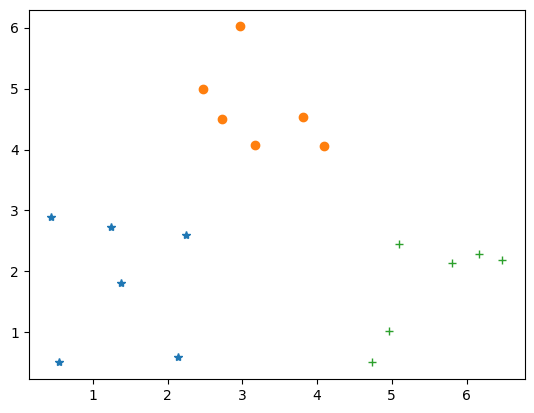

In [84]:
x1 = np.array([
    [2.1418,0.5950],
    [0.5519,0.5091],
    [1.3836,1.8033],
    [1.2419,2.7278],
    [0.4427,2.8981],
    [2.2427,2.5981]
])

x2 = np.array([
    [2.7302, 4.5080],
    [3.8067, 4.5319],
    [3.1664, 4.0801],
    [2.9686, 6.0172],
    [4.0973, 4.0559],
    [2.4755, 4.9869]
])

x3 = np.array([
    [4.7302, 0.5080],
    [5.8067, 2.1319],
    [6.1664, 2.2801],
    [4.9686, 1.0172],
    [5.0973, 2.4559],
    [6.4755, 2.1869]
])

plt.plot(x1[:,0], x1[:,1], '*')
plt.plot(x2[:,0], x2[:,1], 'o')
plt.plot(x3[:,0], x3[:,1], '+')

In [85]:
x1 = np.concatenate((x1, np.ones([x1.shape[0],1])), axis=1)
x2 = np.concatenate((x2, np.ones([x2.shape[0],1])), axis=1)
x3 = np.concatenate((x3, np.ones([x3.shape[0],1])), axis=1)
w1, w2, w3, ws = np.zeros([3,1]), np.zeros([3,1]), np.zeros([3,1]), np.zeros([3,1])
p=0.6
s = True
n=1
    
while s:
    for i in range(x1.shape[0]):
        x1t= x1[i,:].reshape([3,1])
        if np.dot(x1[i,:],w1) <= np.dot(x1[i,:],w2):
            w1 = w1 + p* x1t
            w2 = w2 - p* x1t
            ws = ws + x1t
        if np.dot(x1[i,:],w1) <= np.dot(x1[i,:],w3):
            w1 = w1 + p* x1t
            w3 = w3 - p* x1t
            ws = ws + x1t

    for i in range(x2.shape[0]):
        x2t= x2[i,:].reshape([3,1])
        if np.dot(x2[i,:],w2) <= np.dot(x2[i,:],w1):
            w2 = w2 + p * x2t
            w1 = w1 - p * x2t
            ws = ws + x2t
        if np.dot(x2[i,:],w2) <= np.dot(x2[i,:],w3):
            w2 = w2 + p * x2t
            w3 = w3 - p * x2t
            ws = ws + x2t

    for i in range(x3.shape[0]):
        x3t= x3[i,:].reshape([3,1])
        if np.dot(x3[i,:],w3) <= np.dot(x3[i,:],w1):
            w3 = w3 + p * x3t
            w1 = w1 - p * x3t
            ws = ws + x3t
        if np.dot(x3[i,:],w3) <= np.dot(x3[i,:],w2):
            w3 = w3 + p * x3t
            w2 = w2 - p * x3t
            ws = ws + x3t
    
    if (np.abs(ws) < 1e-7).all():
        s = False
    else:
        n = n + 1
        ws = np.zeros([3,1])

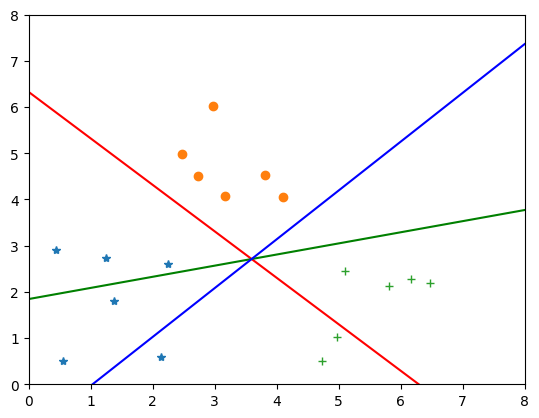

In [86]:
x = np.linspace(0, 8, 100)
y1 = (-w1[0]*x-w1[2])/w1[1]
y2 = (-w2[0]*x-w2[2])/w2[1]
y3 = (-w3[0]*x-w3[2])/w3[1]
plt.plot(x, y1, 'r')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b')
plt.axis([0, 8, 0, 8])
plt.plot(x1[:,0], x1[:,1], '*')
plt.plot(x2[:,0], x2[:,1], 'o')
plt.plot(x3[:,0], x3[:,1], '+')